In [2]:
from libraries import lib
from libraries.NeuralStates import *
import torch
import torch.nn as nn
from kan import *
import matplotlib.pyplot as plt

In [3]:
N=6

In [4]:
layers = []
layers.append(nn.Linear(N, 32))
for _ in range(2):
    layers.append(nn.Linear(32, 32))
    layers.append(nn.SELU())
layers.append(nn.Linear(32, 2))
mlp_model = nn.Sequential(*layers)

In [5]:
param_list = [n for n in mlp_model.parameters()]

In [6]:
len(param_list) # 4 layers of weights and biases

8

In [7]:
def total_params(model):
    params = [n for n in model.parameters()]
    total = 0
    for vec in params:
        shape = vec.shape
        p = 1
        for i in range(len(shape)):
            p *= shape[i]
        total += p
    return total

In [8]:
for i in range(len(param_list)):
    print(param_list[i].shape)

torch.Size([32, 6])
torch.Size([32])
torch.Size([32, 32])
torch.Size([32])
torch.Size([32, 32])
torch.Size([32])
torch.Size([2, 32])
torch.Size([2])


In [9]:
print(total_params(mlp_model))

2402


In [10]:
kan_model = KAN(width=[N, N, 2])

checkpoint directory created: ./model
saving model version 0.0


In [11]:
print(total_params(kan_model))

824


In [12]:
kan_params = [n for n in kan_model.parameters()]

In [13]:
print(kan_params[8].shape)

torch.Size([6, 10])


In [14]:
print(len(kan_params))

22


In [15]:
mlp_counts = []
kan_counts = []
ns = [n for n in range(6, 20)]
for N in ns:
    layers = []
    # layers.append(nn.Linear(N, N))
    # for _ in range(2):
    #     layers.append(nn.Linear(N, N))
    #     layers.append(nn.SELU())
    # layers.append(nn.Linear(N, 2))
    layers.append(nn.Linear(N, 32))
    for _ in range(2):
        layers.append(nn.Linear(32, 32))
        layers.append(nn.SELU())
    layers.append(nn.Linear(32, 2))
    mlp_model = nn.Sequential(*layers)

    kan_model = KAN(width=[N, N, 2]);
    mlp_counts.append(total_params(mlp_model))
    kan_counts.append(total_params(kan_model))
print(mlp_counts)
print(kan_counts)

checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
[2402, 2434, 2466, 2498, 2530, 2562, 2594, 2626, 2658, 2690, 2722, 2754, 2786, 2818]
[824, 1058, 1320, 1610, 1928, 227

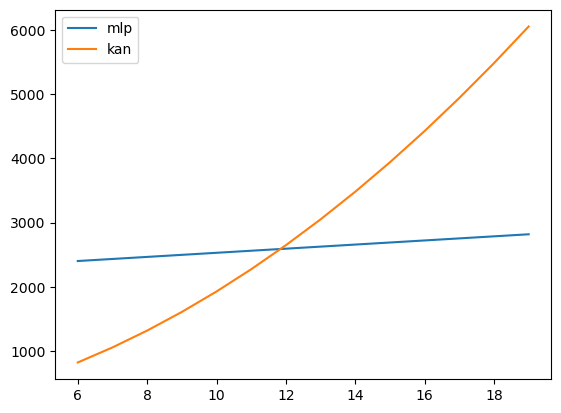

In [16]:
plt.plot(ns, mlp_counts, label = 'mlp')
plt.plot(ns, kan_counts, label = 'kan')
plt.legend(loc = 'best')
plt.show()

In [17]:
N=12
layers = []
layers.append(nn.Linear(N, 32))
for _ in range(2):
    layers.append(nn.Linear(32, 32))
    layers.append(nn.SELU())
layers.append(nn.Linear(32, 2))
mlp_12 = nn.Sequential(*layers)
kan_12 = KAN(width=[N, N, 2])

checkpoint directory created: ./model
saving model version 0.0


In [18]:
input_12 = lib.generate_input_torch(N)

In [19]:
%%timeit
input_12 = lib.generate_input_torch(N)

5.82 ms ± 72.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%%timeit
mlp_12(input_12)

658 μs ± 4.86 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [21]:
%%timeit 
kan_12(input_12)

43.6 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
N=6
layers = []
layers.append(nn.Linear(N, 32))
for _ in range(2):
    layers.append(nn.Linear(32, 32))
    layers.append(nn.SELU())
layers.append(nn.Linear(32, 2))
mlp_6 = nn.Sequential(*layers)
kan_6 = KAN(width=[N, N, 2])

checkpoint directory created: ./model
saving model version 0.0


In [24]:
input_6 = lib.generate_input_torch(N)

In [25]:
%%timeit
input_6 = lib.generate_input_torch(N)

63.3 μs ± 437 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [26]:
%%timeit
mlp_6(input_6)

45.4 μs ± 1.02 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
%%timeit 
kan_6(input_6)

4.5 ms ± 191 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


: 